<a href="https://colab.research.google.com/github/Super-rookie-Py/_Numpy_assign/blob/master/%EB%B0%95%EA%B1%B4%EC%9A%B0_%5B%EA%B3%BC%EC%A0%9C%5D_%EC%8B%A4%EC%A0%84_%EC%9D%B8%ED%84%B0%EB%9E%99%ED%8B%B0%EB%B8%8C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실전 인터랙티브 데이터 시각화

분석할 데이터를 읽고, Bokeh 라이브러리를 사용하여 다양한 인터랙티브 시각화 만들기

## 데이터 파일 읽기
- 데이터 출처 캐글 https://www.kaggle.com/neuromusic/avocado-prices
- 아보카도 가격 데이터

### 데이터 정보

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# csv 파일 불러오기
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data = data.set_index("Date")
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


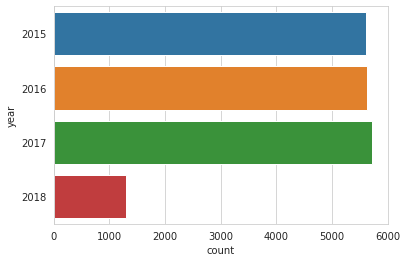

In [6]:
sns.countplot(y = 'year', data = data);

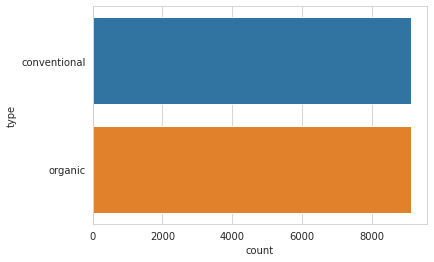

In [7]:
sns.countplot(y = 'type', data = data);

In [8]:
# 데이터가 많아서 시카고 지역의 데이터만 추출
data = data[data['region'] == 'Chicago']

In [9]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago
2015-12-20,1,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago
2015-12-13,2,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago
2015-12-06,3,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago
2015-11-29,4,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago


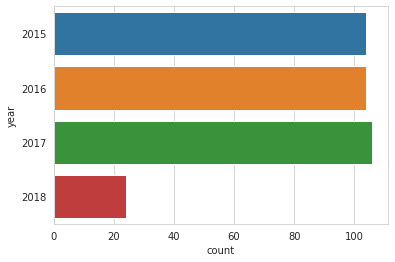

In [10]:
sns.countplot(y = 'year', data = data);

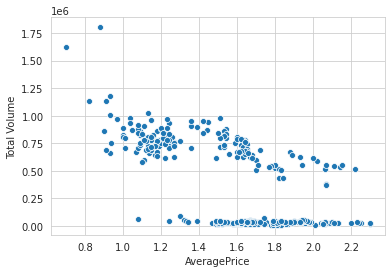

In [11]:
sns.scatterplot(data['AveragePrice'], data['Total Volume']);

## 인터랙티브 데이터 시각화

In [12]:
from bokeh.io import output_notebook, show
from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource , figure, show
from random import random
output_notebook()


In [23]:
x = data["AveragePrice"]
y = data["Total Volume"] 

from bokeh.models import LinearColorMapper, ColorBar
from bokeh.transform import transform

source = ColumnDataSource(data)

color_mapper = LinearColorMapper(palette = 'Inferno256',
                                 low = data.year.min(),
                                 high = data.year.max())
p = figure(x_axis_label = 'AveragePrice', y_axis_label = 'Total Volume',
           tools="lasso_select", title = "Avocado by Chicago" )

p.circle(x='AveragePrice',y = 'Total Volume', 
         color = transform('year', color_mapper),
         size = 8, alpha = 0.5, source = data,
         selection_color = "forestgreen", selection_alpha = 0.4)

color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 10,
                     location=(0, 0), title = 'year')
p.add_layout(color_bar, 'right')

show(p)